## EDA with Python and applying Logistic Regression 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv("Dataset/Titanic dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploratory Data Analysis 
lets begin some exploratory data analysis ,we will start by checking the Missing values


### Missing Data
we can use seaborn to create a simple heatmap to see where we are missing data

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df["Survived"].value_counts(0) 

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: >

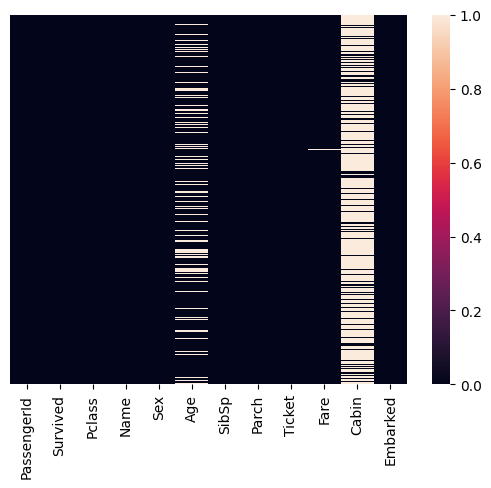

In [67]:
sns.heatmap(df.isnull(),yticklabels=False)

<Axes: xlabel='Survived', ylabel='count'>

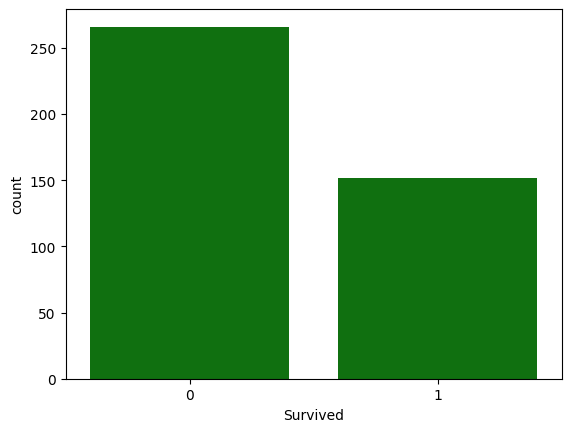

In [5]:
sns.countplot(x='Survived', data = df, color ="green")

<Axes: xlabel='Survived', ylabel='count'>

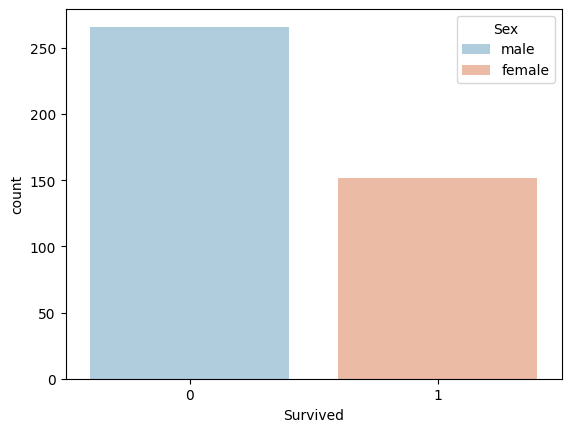

In [6]:
sns.countplot(x='Survived', data = df, hue="Sex", palette ="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

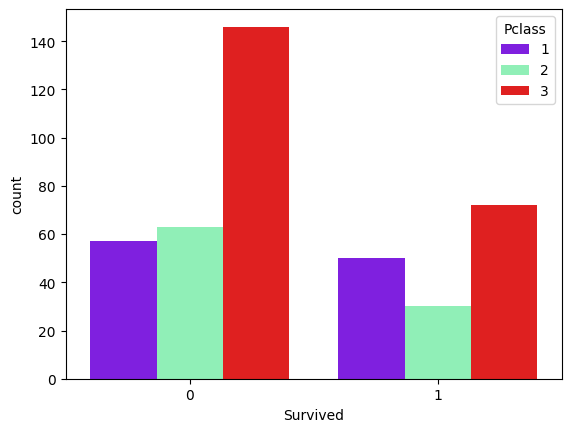

In [7]:
sns.countplot(x='Survived', data = df, hue="Pclass", palette ="rainbow")

C:\Users\HP\AppData\Local\Temp\ipykernel_12864\3083897265.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"].dropna(),kde = False, color = "black")


<Axes: xlabel='Age'>

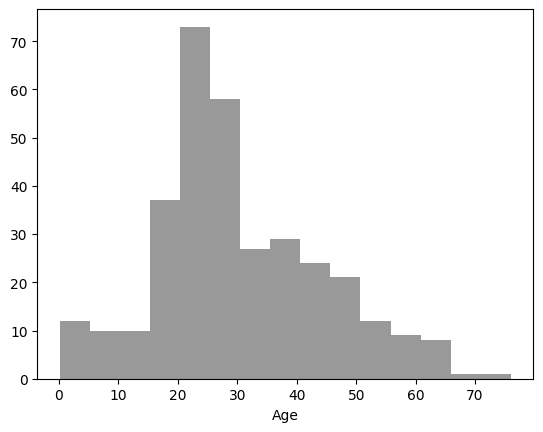

In [8]:
sns.distplot(df["Age"].dropna(),kde = False, color = "black")

<Axes: xlabel='Age', ylabel='count'>

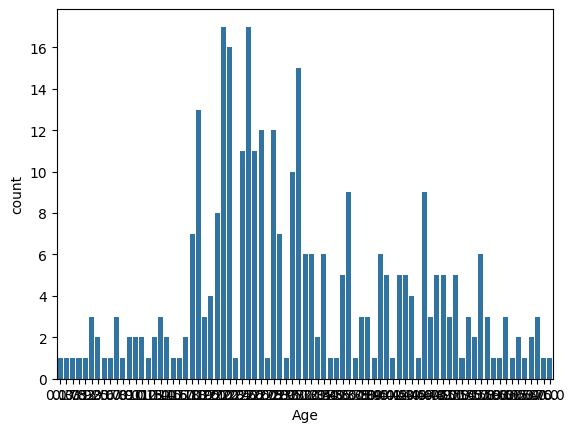

In [9]:
sns.countplot(x="Age", data = df)

## Data Cleaning
we want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passenger(imputation) However we can smarter about this and check the average age by passenger age by passenger class.  


<Axes: xlabel='Pclass', ylabel='Age'>

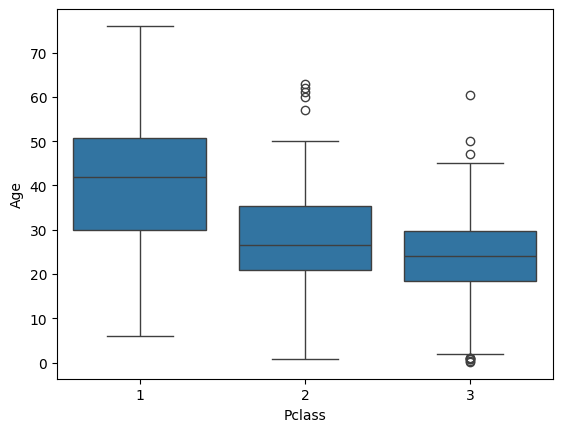

In [10]:
sns.boxplot(x="Pclass",y="Age", data = df)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        if Pclass == 2:
            return 28
        if Pclass == 3:
            return 25
        
    else :
        return Age
            

In [12]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_24260\3740600977.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_24260\3740600977.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

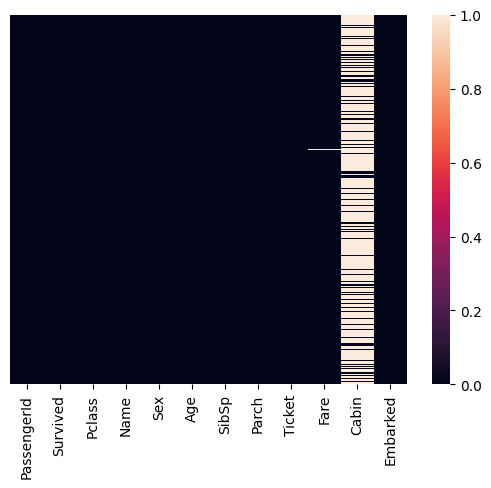

In [13]:
sns.heatmap(df.isnull(),yticklabels=False)

In [16]:
df.drop("Cabin",axis=1,inplace=True)


KeyError: "['Cabin'] not found in axis"

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,S


<Axes: >

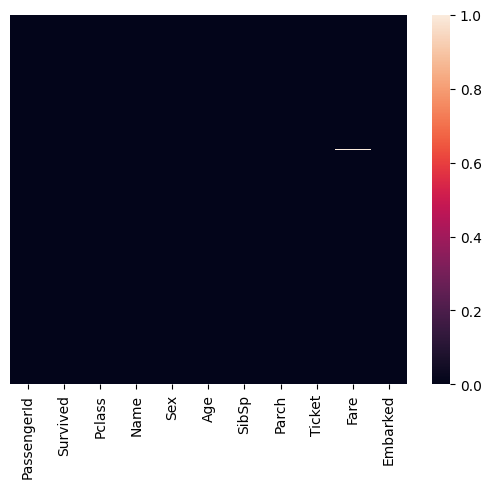

In [21]:
sns.heatmap(df.isnull(),yticklabels=False)

In [26]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24260\3734075825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(),inplace=True)


## Without inplace=True
df['Fare'].fillna(df['Fare'].median())


- This returns a new Series with missing values filled.

- But your original df['Fare'] column is not changed unless you reassign it:

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

##  With inplace=True
df['Fare'].fillna(df['Fare'].median(), inplace=True)


- This modifies df directly.

- You don’t need to reassign.

- Saves memory and keeps code shorter.

<Axes: >

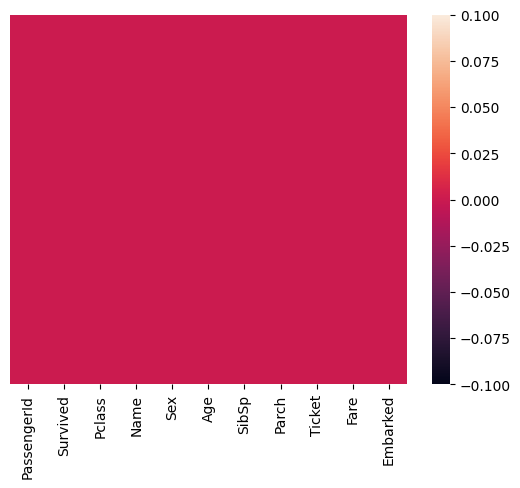

In [25]:
sns.heatmap(df.isnull(),yticklabels=False)

In [42]:
Embraked = pd.get_dummies(df["Embarked"],drop_first=True).head()

In [ ]:
sex= pd.get_dummies(df["Sex"],drop_first=True).head() 

KeyError: 'Sex'

In [32]:
df.drop(['Sex',"Name","Ticket"],axis = 1, inplace = True)

KeyError: "['Sex', 'Name', 'Ticket'] not found in axis"

In [40]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,34.5,0,0,7.8292,Q
1,893,1,3,47.0,1,0,7.0000,S
2,894,0,2,62.0,0,0,9.6875,Q
3,895,0,3,27.0,0,0,8.6625,S
4,896,1,3,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,0,3,25.0,0,0,8.0500,S
414,1306,1,1,39.0,0,0,108.9000,C
415,1307,0,3,38.5,0,0,7.2500,S
416,1308,0,3,25.0,0,0,8.0500,S
